# Final Project: Load balancing

Time is discrete. Let $Q_1$ and $Q_2$ denote the total number of jobs in the server $1$ and $2$, respectively.
Every time slot, the dispatcher observes ($Q_1$, $Q_2$) and takes the action $a_i$, $i = 1, 2$, that dispatches a potential new incoming job to server $i$. The cost in every time slot is $Q_1 + Q_2$, independently of the
action.

In every time slot, there is a probability $\lambda$ of having a new job, which will be dispatched to server
ai. If $Q_i > 0$, with probability $\mu_i$ a job from server i will depart. For simplicity, we will assume that
in every time slot, only one event can happen, i.e., either an arrival, or a departure from servers $1$ or
$2$

For example, in the state $(2,1)$, if the dispatcher takes the action $1$, we have that with probability $\lambda$ the next state will be $(3,1)$, with probability $\mu_1 (1,1)$, , with probability $\mu_2 (2,0)$, and with probability 1 − $\mu_1$ − $\mu_2$ − $\lambda$ the next state will be $(2,1)$.

We will assume that there is an upper bound for both $Q_1$ and $Q_2$ equal to 20. If either $Q_1 = 20$ or $Q_2 = 20$, no new incoming job will arrive to the system.

Let us choose $\mu_1=0.2, \mu_2=0.4$ and $\lambda = 0.3$. Throughout we take that the discounting factor is $\gamma = 0.99$

## 1. MDP

### 1.1. Policy Evaluation

Assume the random policy that dispatches every job with probability $0.5$ to either queue $1$ and $2$.

- Write down the Bellman equation that characterizes the value function for this policy.

- Calculate the value function for this policy using Iterative Policy Evaluation. Due to the contraction principle, the initial vector can be arbitrary, so you can take V (Q1, Q2) = 0, for all (Q1, Q2). To stop iterating, you can take as a criterion that the difference between two iterations must be smaller than some small δ.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

lamda = 0.3
mu1 = 0.2
mu2 = 0.4
gamma = 0.99
p1 = 0.5
p2 = 0.5
p_Q1_Q2_a1 = p1 * (1-mu1-mu2-lamda)
p_Q1_Q2_a2 = p2 * (1-mu1-mu2-lamda)

p_Q1p1_Q2_a1 = p1 * lamda
p_Q1_Q2p1_a2 = p2 * lamda

p_Q1m1_Q2_a1 = p1 * mu1
p_Q1m1_Q2_a2 = p2 * mu1

p_Q1_Q2m1_a1 = p1 * mu2
p_Q1_Q2m1_a2 = p2 * mu2


def value1(epsilon):
    Vn = np.zeros((21,21))
    Vn_p1 = np.zeros((21,21))
    first_boucle = True
    count = 0

    while np.max(abs((Vn_p1 - Vn))) > epsilon or first_boucle:
        count +=1
        first_boucle = False
        action = np.random.randint(0,2)
        Vn = Vn_p1.copy()
        for Q1 in range(21):
            for Q2 in range(21):
                rec = - (Q1 + Q2)

                if Q1 == 20:
                    Vn_Q1p1_Q2 = Vn[Q1,Q2]
                else:
                    Vn_Q1p1_Q2 = Vn[Q1+1,Q2]
                
                if Q2 == 20:
                    Vn_Q1_Q2p1 = Vn[Q1,Q2]
                else:
                    Vn_Q1_Q2p1 = Vn[Q1, Q2+1]

                if Q1 == 0:
                    Vn_Q1m1_Q2 = Vn[Q1,Q2]
                else:
                    Vn_Q1m1_Q2 = Vn[Q1-1,Q2]
                
                if Q2 == 0:
                    Vn_Q1_Q2m1 = Vn[Q1,Q2]
                else:
                    Vn_Q1_Q2m1 = Vn[Q1, Q2-1]


                Vn_p1[Q1,Q2] = rec + gamma * (p_Q1_Q2_a1 * Vn[Q1,Q2]
                                    + p_Q1p1_Q2_a1 * Vn_Q1p1_Q2
                                    + p_Q1_Q2p1_a2 * Vn_Q1_Q2p1
                                    + p_Q1m1_Q2_a1 * Vn_Q1m1_Q2
                                    + p_Q1_Q2m1_a1 * Vn_Q1_Q2m1
                                    + (p_Q1_Q2_a2 * Vn[Q1,Q2]
                                    + p_Q1m1_Q2_a2 * Vn_Q1m1_Q2
                                    + p_Q1_Q2m1_a2 * Vn_Q1_Q2m1))
        
    return Vn_p1, count
                    
epsilon = 1e-5
Value_final, count_final = value1(epsilon)
print(count_final)

1273


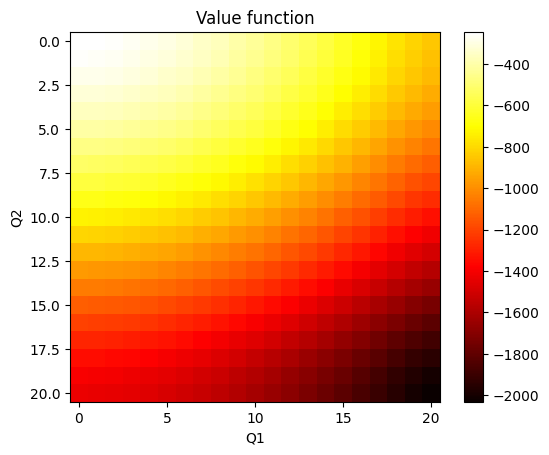

In [2]:
#add plot with titles
plt.imshow(Value_final,cmap='hot')
plt.colorbar()
plt.title('Value function')
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.show()

## Optimal Control

In this part you are asked to find the optimal policy to dispatch incoming jobs.

- Write down the Bellman equation that characterizes the optimal policy.

>>> 

- Solve numerically the optimality value function by Value Iteration Algorithm.




In [3]:
lamda = 0.3
mu1 = 0.2
mu2 = 0.4
gamma = 0.99

p_Q1_Q2_a1 = (1-mu1-mu2-lamda)
p_Q1_Q2_a2 = (1-mu1-mu2-lamda)

p_Q1p1_Q2_a1 = lamda
p_Q1_Q2p1_a2 = lamda

p_Q1m1_Q2_a1 = mu1
p_Q1m1_Q2_a2 = mu1

p_Q1_Q2m1_a1 = mu2
p_Q1_Q2m1_a2 = mu2

actiontab = np.zeros((21,21))


def optimal_value(epsilon):
    Vn = np.zeros((21,21))
    Vn_p1 = np.zeros((21,21))
    first_boucle = True
    count = 0

    while np.max(abs(Vn_p1 - Vn)) > epsilon or first_boucle:
        count +=1
        first_boucle = False
        action = np.random.randint(0,2)
        Vn = Vn_p1.copy()
        for Q1 in range(21):
            for Q2 in range(21):
                rec = - (Q1 + Q2)

                if Q1 == 20:
                    if Q2 == 20:
                        Vn_Q1p1_Q2 = Vn[Q1,Q2]
                        Vn_Q1_Q2p1 = 0
                        actiontab[Q1,Q2] = 3
                    else:
                        Vn_Q1_Q2p1 = Vn[Q1, Q2+1]
                        Vn_Q1p1_Q2 = 0
                        actiontab[Q1,Q2] = 2
                else:
                    if Q2 == 20:
                        Vn_Q1_Q2p1 = 0
                        Vn_Q1p1_Q2 = Vn[Q1+1 ,Q2]
                        actiontab[Q1,Q2] = 1
                    else:
                        if Vn[Q1, Q2+1] >= Vn[Q1+1,Q2]:
                            Vn_Q1_Q2p1 = Vn[Q1, Q2+1]
                            Vn_Q1p1_Q2 = 0
                            actiontab[Q1,Q2] = 2
                        else:
                            Vn_Q1_Q2p1 = 0
                            Vn_Q1p1_Q2 = Vn[Q1+1 ,Q2]
                            actiontab[Q1,Q2] = 1

                if Q1 == 0:
                    Vn_Q1m1_Q2 = Vn[Q1,Q2]
                else:
                    Vn_Q1m1_Q2 = Vn[Q1-1,Q2]
                
                if Q2 == 0:
                    Vn_Q1_Q2m1 = Vn[Q1,Q2]
                else:
                    Vn_Q1_Q2m1 = Vn[Q1, Q2-1]


                Vn_p1[Q1,Q2] = rec + gamma * (p_Q1_Q2_a1 * Vn[Q1,Q2]
                                    + p_Q1p1_Q2_a1 * Vn_Q1p1_Q2
                                    + p_Q1_Q2p1_a2 * Vn_Q1_Q2p1
                                    + p_Q1m1_Q2_a1 * Vn_Q1m1_Q2
                                    + p_Q1_Q2m1_a1 * Vn_Q1_Q2m1)
        
    return Vn_p1, actiontab, count
                    
epsilon = 0.01
Value_final_optimal, optimal_politic, count = optimal_value(epsilon)
print(optimal_politic)
print(count)

[[2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.]
 [2. 2. 2.

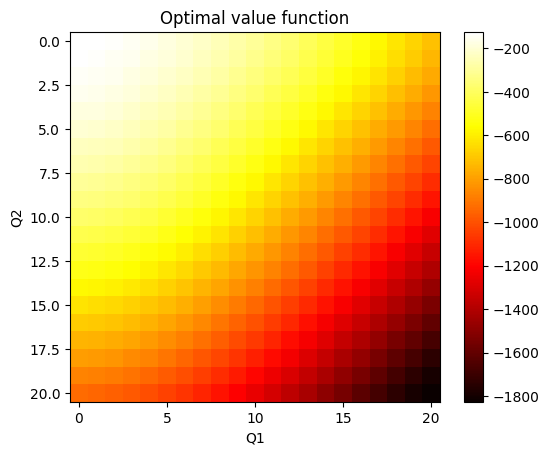

In [4]:
plt.imshow(Value_final_optimal,cmap='hot')
plt.colorbar()
plt.title('Optimal value function')
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.show()

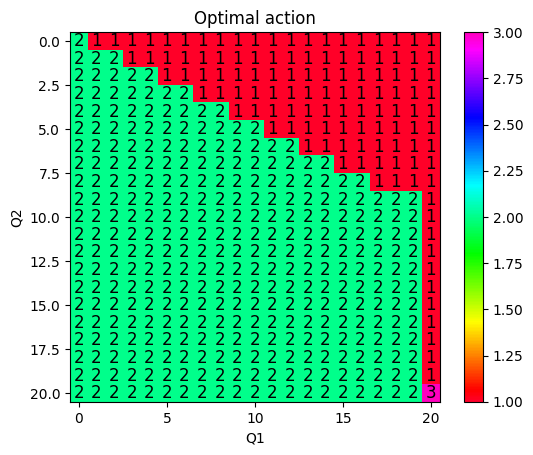

In [5]:
# plot for the optimal action and add values on the cmap

plt.imshow(optimal_politic,cmap='gist_rainbow')

# Add values to each cell
for i in range(optimal_politic.shape[0]):
    for j in range(optimal_politic.shape[1]):
        value = int(optimal_politic[i, j])
        plt.annotate(str(value), (j, i), fontsize=12, ha='center', va='center')


plt.colorbar()
plt.title('Optimal action')
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.show()

- Represent on the plane the optimal action as a function of the state (Q1, Q2).

[[[ 0.  1.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]]

 [[ 0.  1.]
  [ 0.  1.]
  [ 0.  1.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]]

 [[ 0.  1.]
  [ 0.  1.]
  [ 0.  1.]
  [ 0.  1.]
  [ 0.  1.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]]

 [[ 0.  1.]
  [ 0.  1.]
  [ 0.  1.]
  [ 0.  1.]
  [ 0.  1.]
  [ 0.  1.]
  [ 0.  1.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.]
  [ 1.  0.

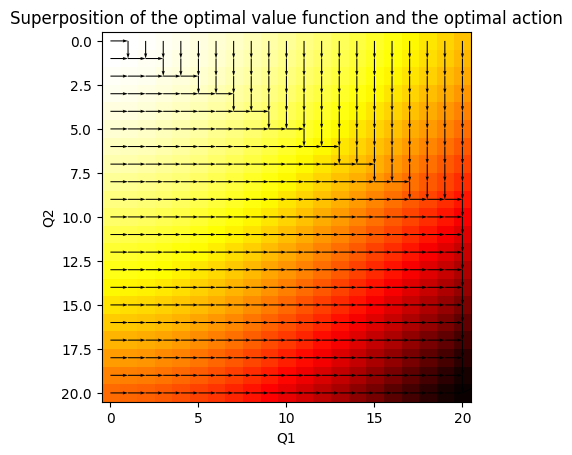

In [6]:
vecteurs = np.zeros((21,21,2))
for i in range(21):
    for j in range(21):
        new_vector = (optimal_politic[i][j] - 1) * np.array([0,1]) - (optimal_politic[i][j] - 2) * np.array([1,0])
        vecteurs[i,j] = new_vector
print(vecteurs)

fig, ax = plt.subplots()
ax.imshow(Value_final_optimal,cmap='hot')
ax.quiver(vecteurs[:,:,1], vecteurs[:,:,0], angles='xy', scale_units = 'xy', scale=1)
plt.title('Superposition of the optimal value function and the optimal action')
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.show()

- Compare the performances obtained with the random policy and the optimal one, how can you conclude that the optimal policy performs better ?

In [7]:
print(np.mean(Value_final_optimal))
print(np.mean(Value_final))
print(np.array((Value_final_optimal - Value_final) > 0))
# On peut remarquer que la difference entre la politique optimal et la politique aléatoire est bien positive. Ainsi la première est surement meilleure que la deuxième.

-753.3572880791564
-1010.0603848030414
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True 

We observe that $ \mathbb{E}[V_{\text{optimal}}] > \mathbb{E}[V_{\text{random}}] $, therefore we can conclude that the optimal policy performs better than the random policy.

- Carry out a one-step improvement on the random policy, what do you observe ?

In [8]:
import numpy as np
import matplotlib.pyplot as plt

lamda = 0.3
mu1 = 0.2
mu2 = 0.4
gamma = 0.99
p1 = 0.5
p2 = 0.5
p_Q1_Q2_a1 = p1 * (1-mu1-mu2-lamda)
p_Q1_Q2_a2 = p2 * (1-mu1-mu2-lamda)

p_Q1p1_Q2_a1 = p1 * lamda
p_Q1_Q2p1_a2 = p2 * lamda

p_Q1m1_Q2_a1 = p1 * mu1
p_Q1m1_Q2_a2 = p2 * mu1

p_Q1_Q2m1_a1 = p1 * mu2
p_Q1_Q2m1_a2 = p2 * mu2


def one_step_improvement(epsilon):
    Vn = np.zeros((21,21))
    Vn_p1 = np.zeros((21,21))
    Vn_p1_a1 = np.zeros((21,21))
    Vn_p1_a2 = np.zeros((21,21))
    first_boucle = True
    count = 0

    while np.max(abs((Vn_p1 - Vn))) > epsilon or first_boucle:
        count +=1
        first_boucle = False
        action = np.random.randint(0,2)
        Vn = Vn_p1.copy()
        for Q1 in range(21):
            for Q2 in range(21):
                rec = - (Q1 + Q2)

                if Q1 == 20:
                    Vn_Q1p1_Q2 = Vn[Q1,Q2]
                else:
                    Vn_Q1p1_Q2 = Vn[Q1+1,Q2]
                
                if Q2 == 20:
                    Vn_Q1_Q2p1 = Vn[Q1,Q2]
                else:
                    Vn_Q1_Q2p1 = Vn[Q1, Q2+1]

                if Q1 == 0:
                    Vn_Q1m1_Q2 = Vn[Q1,Q2]
                else:
                    Vn_Q1m1_Q2 = Vn[Q1-1,Q2]
                
                if Q2 == 0:
                    Vn_Q1_Q2m1 = Vn[Q1,Q2]
                else:
                    Vn_Q1_Q2m1 = Vn[Q1, Q2-1]


                Vn_p1[Q1,Q2] = rec + gamma * (p_Q1_Q2_a1 * Vn[Q1,Q2]
                                    + p_Q1p1_Q2_a1 * Vn_Q1p1_Q2
                                    + p_Q1_Q2p1_a2 * Vn_Q1_Q2p1
                                    + p_Q1m1_Q2_a1 * Vn_Q1m1_Q2
                                    + p_Q1_Q2m1_a1 * Vn_Q1_Q2m1
                                    + (p_Q1_Q2_a2 * Vn[Q1,Q2]
                                    + p_Q1m1_Q2_a2 * Vn_Q1m1_Q2
                                    + p_Q1_Q2m1_a2 * Vn_Q1_Q2m1))

    Vn = Vn_p1.copy()
    for Q1 in range(21):
        for Q2 in range(21):
            rec = - (Q1 + Q2)

            if Q1 == 20:
                Vn_Q1p1_Q2 = Vn[Q1,Q2]
            else:
                Vn_Q1p1_Q2 = Vn[Q1+1,Q2]
            
            if Q2 == 20:
                Vn_Q1_Q2p1 = Vn[Q1,Q2]
            else:
                Vn_Q1_Q2p1 = Vn[Q1, Q2+1]

            if Q1 == 0:
                Vn_Q1m1_Q2 = Vn[Q1,Q2]
            else:
                Vn_Q1m1_Q2 = Vn[Q1-1,Q2]
            
            if Q2 == 0:
                Vn_Q1_Q2m1 = Vn[Q1,Q2]
            else:
                Vn_Q1_Q2m1 = Vn[Q1, Q2-1]


            Vn_p1_a1[Q1,Q2] = rec + gamma * (p_Q1_Q2_a1 * Vn[Q1,Q2]
                                + p_Q1p1_Q2_a1 * Vn_Q1p1_Q2
                                + p_Q1m1_Q2_a1 * Vn_Q1m1_Q2
                                + p_Q1_Q2m1_a1 * Vn_Q1_Q2m1)
            
            Vn_p1_a2[Q1,Q2] = rec + gamma * (p_Q1_Q2p1_a2 * Vn_Q1_Q2p1
                                + p_Q1_Q2_a2 * Vn[Q1,Q2]
                                + p_Q1m1_Q2_a2 * Vn_Q1m1_Q2
                                + p_Q1_Q2m1_a2 * Vn_Q1_Q2m1)
            
            if Vn_p1_a1[Q1,Q2] >= Vn_p1_a2[Q1,Q2]:
                Vn_p1[Q1,Q2] = Vn_p1_a1[Q1,Q2]
            else:
                Vn_p1[Q1,Q2] = Vn_p1_a2[Q1,Q2]


    return Vn_p1, count
                    
epsilon = 1e-5
Value_final_one_step_imp, count_final_one_step_imp = one_step_improvement(epsilon)
print(count_final_one_step_imp)

1273


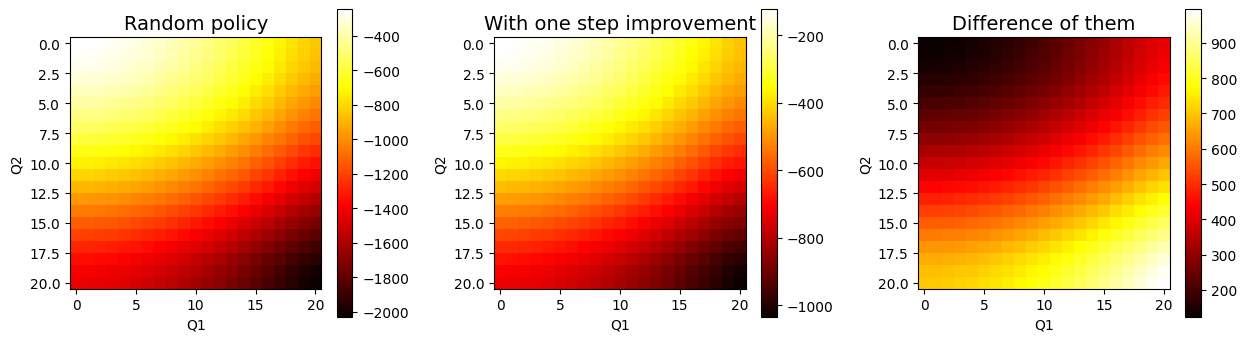

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  

In [9]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Value_final,cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('Random policy', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Value_final_one_step_imp,cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('With one step improvement', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')


ax_2=ax[2].imshow(Value_final_one_step_imp - Value_final,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Difference of them', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.show()
print((Value_final_one_step_imp - Value_final) > 0)

L'algorithme avec un "one-step improvement" produit des résultats supérieurs à celui basé sur l'évaluation d'une politique aléatoire pour plusieurs raisons :

1. **Local Adjustment:** La méthode "one-step improvement" effectue une ajustement local de la politique en fonction de la valeur actuelle des états, tandis que l'évaluation d'une politique aléatoire peut ne pas exploiter pleinement les informations locales disponibles.

2. **Immediate Benefit:** La procédure "one-step improvement" prend en compte les retours attendus immédiats pour chaque action dans chaque état, ce qui peut rapidement conduire à des améliorations locales significatives.

3. **Use of Current Information:** En utilisant la fonction de valeur actuelle, "one-step improvement" prend des décisions plus informées, tenant compte des connaissances actuelles de l'environnement, ce qui peut conduire à des choix d'actions plus optimaux.

En somme, cette approche profite des informations actuelles pour effectuer des ajustements ciblés, ce qui peut rapidement améliorer les performances par rapport à une politique aléatoire. 


## 2. Tabular Model-Free control

### 2.1 Policy Evaluation

Assume the random policy that dispatches every job with probability 0.5 to either queue 1 and 2. For the learning parameter you can use $\alpha_n = \frac{1}{n}$

- Implement TD(0)

In [28]:
# Implement TD(0) with probability 0.5 to either queue 1 and 2, and take alpha = 1/n

import numpy as np
import math

lamda = 0.3

mu1 = 0.2
mu2 = 0.4

gamma = 0.99

p1 = 0.5

p2 = 0.5
# Simulate the environment

def simulate_env(Q1, Q2, action):
    Q1_minus_possible = True
    Q2_minus_possible = True
    Q1_plus_possible = True
    Q2_plus_possible = True
    one_action_done = False

    if Q1 == 20:
        Q1_plus_possible = False
        if Q2 == 20:
            Q2_plus_possible = False
            action = 2
        else:
            Q2_plus_possible = True
            action = 1
    else:
        Q1_plus_possible = True
        if Q2 == 20:
            Q2_plus_possible = False
            action = 0
        else:
            Q2_plus_possible = True

    if Q1 == 0:
        Q1_minus_possible = False
    else:
        Q1_minus_possible = True
    
    if Q2 == 0:
        Q2_minus_possible = False
    else:
        Q2_minus_possible = True

    if action == 0:
        if np.random.uniform() < lamda and Q1_plus_possible:
            Q1 += 1
            one_action_done = True
    else:
        if np.random.uniform() < lamda and Q2_plus_possible:
            Q2 += 1
            one_action_done = True
    
    if np.random.uniform() < mu1 and Q1_minus_possible and not one_action_done:
        Q1 -= 1
        one_action_done = True
    if np.random.uniform() < mu2 and Q2_minus_possible and not one_action_done:
        Q2 -= 1
    
    return Q1, Q2

# Implement TD(0)

def TD0(alpha, n):
    Vn = np.zeros((21,21))
    Tirage = np.zeros((21,21))
    first_boucle = True
    count = 0
    Q1 = 0
    Q2 = 0

    while count < n:
        count +=1
        for Q1 in range(21):
            for Q2 in range(21):
                Tirage[Q1,Q2] +=1
                alpha = 1/(Tirage[Q1,Q2])
                # alpha = 1/math.sqrt(math.sqrt(Tirage[Q1,Q2]))
                action = np.random.randint(0,2)
                Q1_new, Q2_new = simulate_env(Q1, Q2, action)
                Vn[Q1,Q2] = Vn[Q1,Q2] + alpha * (- (Q1 + Q2) + gamma * Vn[Q1_new,Q2_new] - Vn[Q1,Q2])

                # Q1 = np.random.randint(0,21)
                # Q2 = np.random.randint(0,21)
    
    return Vn

n = 3000 

Value_final_TD0 = TD0(1, n)
print(Value_final_TD0)



[[  -1.21064752   -2.60644349   -5.72320975   -8.51367662  -12.2239611
   -14.58638478  -18.0492104   -21.06775112  -23.46648501  -29.08357545
   -33.68355538  -39.7282811   -42.01039463  -43.60083297  -45.30638183
   -51.58507878  -56.29434226  -61.15272065  -65.44856919  -67.19850601
   -69.91534828]
 [  -2.81289125   -5.6510227    -9.10855144  -13.1511347   -15.66084658
   -19.49655296  -27.94085254  -26.79056743  -27.99049081  -33.60820331
   -33.77409208  -38.03506758  -39.85839414  -43.26204535  -45.79221936
   -57.17529713  -72.83624202  -87.12285707  -99.45657756  -80.98916017
   -71.93480508]
 [  -5.23647988  -10.41664045  -12.99229496  -15.67398804  -18.18883237
   -24.27388808  -30.06145261  -38.82316661  -39.56985311  -40.89683768
   -38.17908166  -40.39167027  -42.32159995  -47.66202317  -50.93391889
   -66.13730029  -67.82485993  -65.54505574  -68.14953821  -72.62385689
   -71.27614204]
 [ -10.0595902   -14.66302162  -17.33341474  -19.08909777  -24.4998887
   -28.04182476

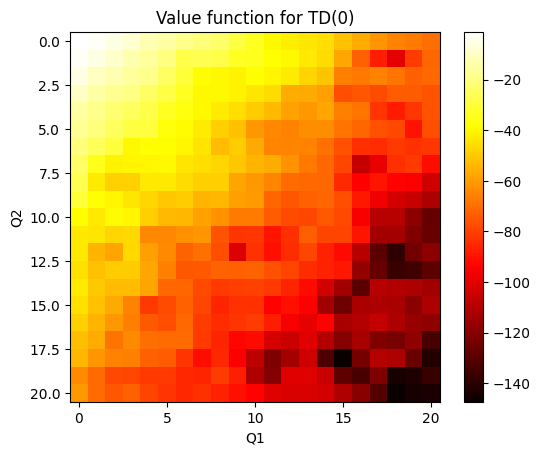

In [29]:
plt.imshow(Value_final_TD0,cmap='hot')
plt.colorbar()
plt.title('Value function for TD(0)')
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.show()

- Compare the obtained value function with the results of Section 1.

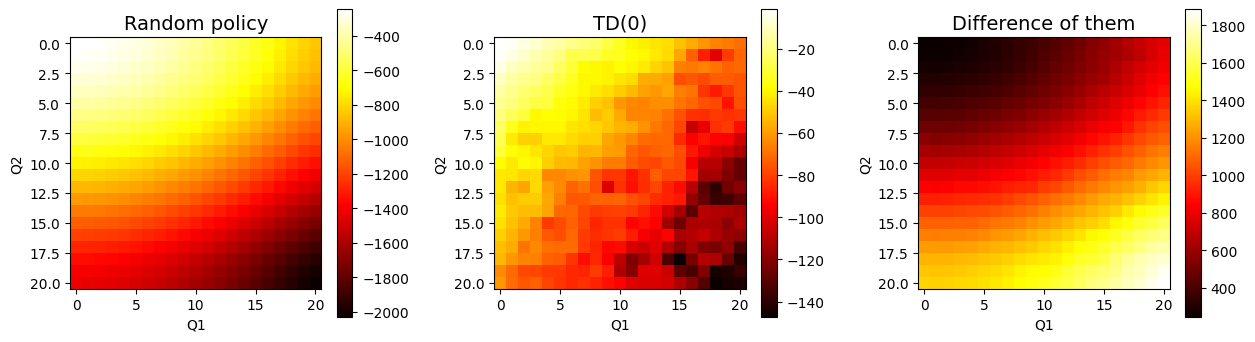

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  

In [30]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Value_final,cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('Random policy', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Value_final_TD0,cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('TD(0)', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')


ax_2=ax[2].imshow(Value_final_TD0 - Value_final,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Difference of them', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.show()
print((Value_final_TD0 - Value_final) > 0)

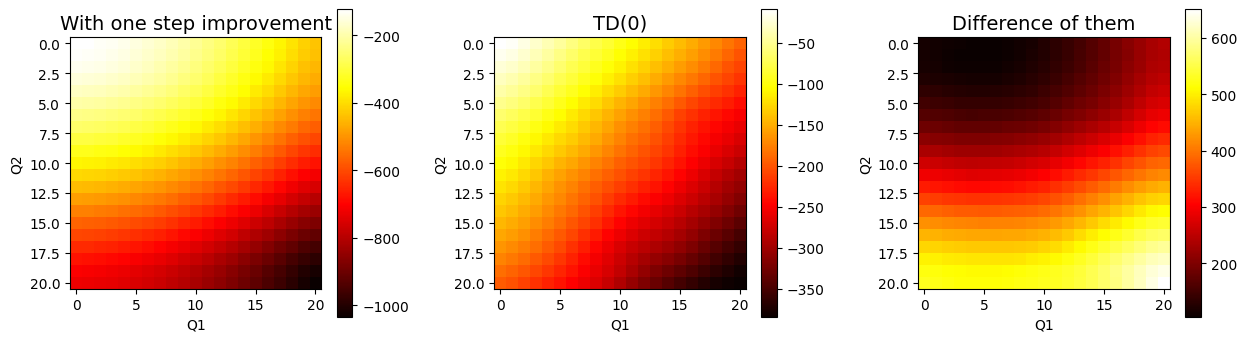

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  

In [23]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Value_final_one_step_imp,cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('With one step improvement', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Value_final_TD0,cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('TD(0)', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')


ax_2=ax[2].imshow(Value_final_TD0 - Value_final_one_step_imp,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Difference of them', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.show()
print((Value_final_TD0 - Value_final_one_step_imp) > 0)

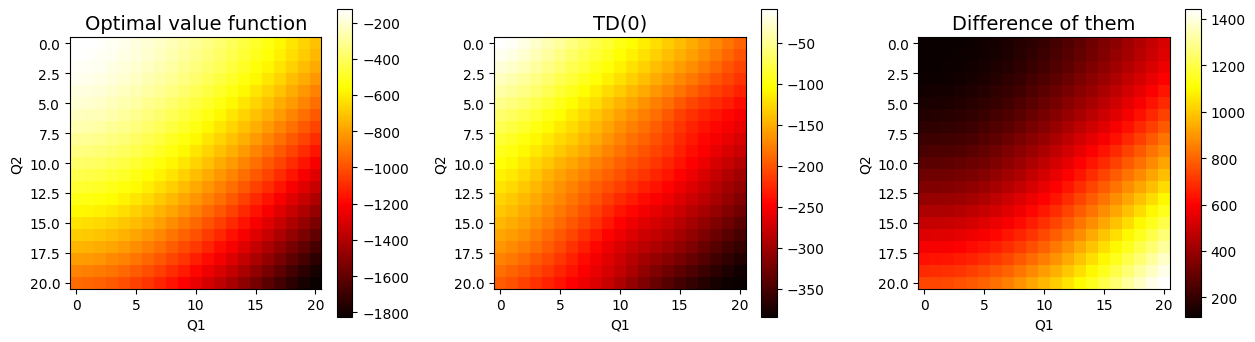

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  

In [24]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Value_final_optimal,cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('Optimal value function', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Value_final_TD0,cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('TD(0)', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')


ax_2=ax[2].imshow(Value_final_TD0 - Value_final_optimal,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Difference of them', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.show()

print((Value_final_TD0 - Value_final_optimal) > 0)


- Explore other alternatives for $\alpha_n$, for example constant, to see if convergence improves
- TODO: Copy code from above and change the alpha by: a constant, and 1/sqrt(count), comment the results

In [15]:
# Implement TD(0) with probability 0.5 to either queue 1 and 2, and take alpha = 1/n

import numpy as np
import math

lamda = 0.3

mu1 = 0.2
mu2 = 0.4

gamma = 0.99

p1 = 0.5

p2 = 0.5
# Simulate the environment

def simulate_env(Q1, Q2, action):
    Q1_minus_possible = True
    Q2_minus_possible = True
    Q1_plus_possible = True
    Q2_plus_possible = True
    one_action_done = False

    if Q1 == 20:
        Q1_plus_possible = False
        if Q2 == 20:
            Q2_plus_possible = False
            action = 2
        else:
            Q2_plus_possible = True
            action = 1
    else:
        Q1_plus_possible = True
        if Q2 == 20:
            Q2_plus_possible = False
            action = 0
        else:
            Q2_plus_possible = True

    if Q1 == 0:
        Q1_minus_possible = False
    else:
        Q1_minus_possible = True
    
    if Q2 == 0:
        Q2_minus_possible = False
    else:
        Q2_minus_possible = True

    if action == 0:
        if np.random.uniform() < lamda and Q1_plus_possible:
            Q1 += 1
            one_action_done = True
    else:
        if np.random.uniform() < lamda and Q2_plus_possible:
            Q2 += 1
            one_action_done = True
    
    if np.random.uniform() < mu1 and Q1_minus_possible and not one_action_done:
        Q1 -= 1
        one_action_done = True
    if np.random.uniform() < mu2 and Q2_minus_possible and not one_action_done:
        Q2 -= 1
    
    return Q1, Q2

# Implement TD(0)

def TD0(alpha, n):
    Vn = np.zeros((21,21))
    Tirage = np.zeros((21,21))
    first_boucle = True
    count = 0
    Q1 = 0
    Q2 = 0

    while count < n:
        count +=1
        for Q1 in range(21):
            for Q2 in range(21):
                Tirage[Q1,Q2] +=1
                alpha = 1
                # alpha = 1/math.sqrt(math.sqrt(Tirage[Q1,Q2]))
                action = np.random.randint(0,2)
                Q1_new, Q2_new = simulate_env(Q1, Q2, action)
                Vn[Q1,Q2] = Vn[Q1,Q2] + alpha * (- (Q1 + Q2) + gamma * Vn[Q1_new,Q2_new] - Vn[Q1,Q2])

                # Q1 = np.random.randint(0,21)
                # Q2 = np.random.randint(0,21)
    
    return Vn

n = 3000

Value_final_TD0 = TD0(1, n)
print(Value_final_TD0)



[[ -545.71215534  -541.25503378  -543.72328145  -544.72328145
   -543.27604863 -1139.08155108 -1130.06067245 -1145.45262858
  -1141.99810229 -1128.08913343 -1129.08913343 -1238.95930252
  -1241.92940252 -1245.4505075  -1293.11221737 -1326.6445822
  -1300.1212952  -1304.12008225 -1343.13934425 -1223.96895866
  -1231.72926907]
 [ -563.24640609  -543.71338145  -544.23634763  -545.23634763
   -544.78398416 -1136.65083557 -1137.65083557 -1143.97810229
  -1139.57812127 -1126.8082421  -1128.7982421  -1327.01035908
  -1243.5001085  -1244.82013474 -1254.79881306 -1327.6445822
  -1333.33823637 -1338.00485401 -1348.7079508  -1231.72926907
  -1359.28282889]
 [ -559.61394202  -544.23634763  -542.79398416  -560.65645017
   -564.36988581  -566.35988581 -1147.44262858 -1141.53832127
   -974.15221017  -964.87379591  -966.86379591  -970.19515795
  -1026.74666598 -1031.47919932 -1258.25082493 -1261.23082493
  -1266.61851668 -1363.89834084 -1355.2208713  -1362.66866258
  -1360.28282889]
 [ -813.5877186   

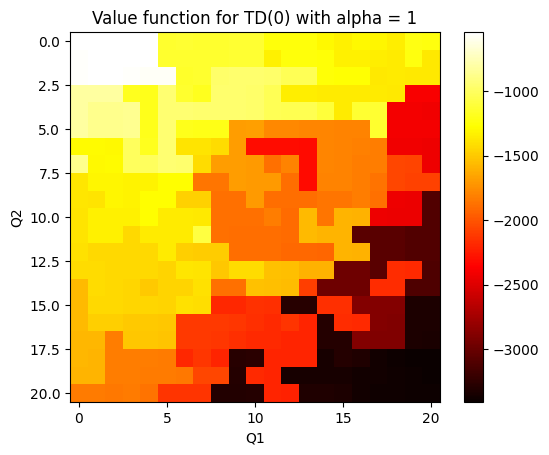

In [16]:
plt.imshow(Value_final_TD0,cmap='hot')
plt.colorbar()
plt.title('Value function for TD(0) with alpha = 1')
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.show()

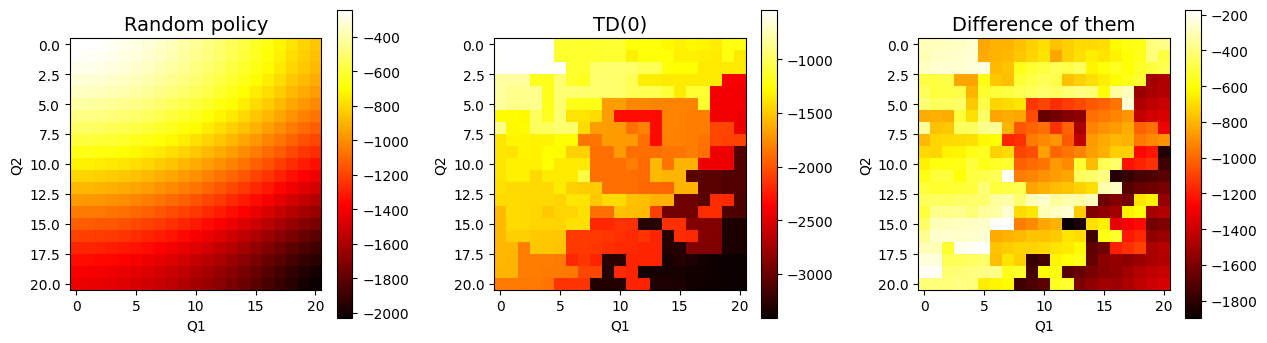

[[False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False F

In [17]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Value_final,cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('Random policy', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Value_final_TD0,cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('TD(0)', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')


ax_2=ax[2].imshow(Value_final_TD0 - Value_final,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Difference of them', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.show()
print((Value_final_TD0 - Value_final) > 0)

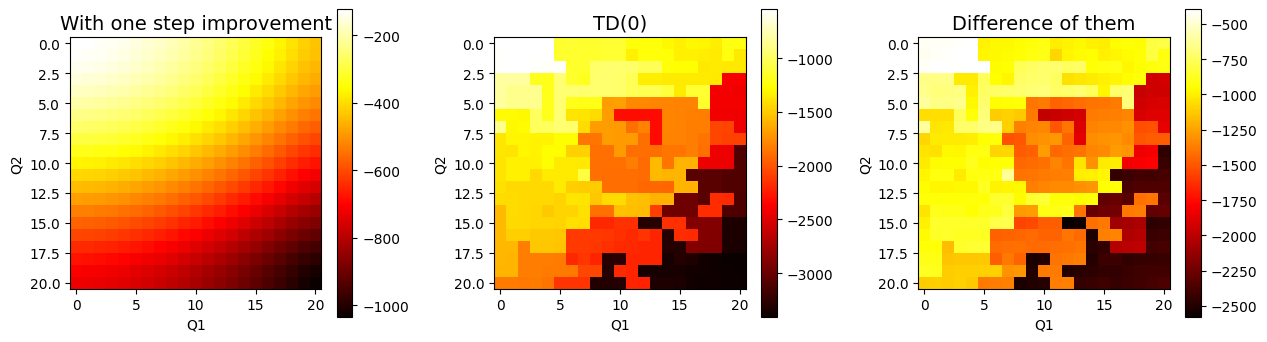

[[False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False F

In [18]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Value_final_one_step_imp,cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('With one step improvement', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Value_final_TD0,cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('TD(0)', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')


ax_2=ax[2].imshow(Value_final_TD0 - Value_final_one_step_imp,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Difference of them', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.show()
print((Value_final_TD0 - Value_final_one_step_imp) > 0)

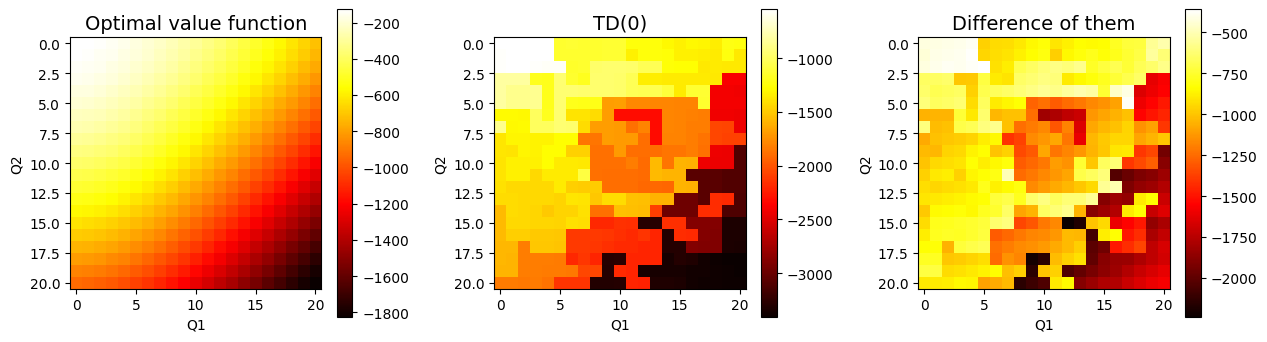

[[False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False F

In [19]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Value_final_optimal,cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('Optimal value function', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Value_final_TD0,cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('TD(0)', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')


ax_2=ax[2].imshow(Value_final_TD0 - Value_final_optimal,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Difference of them', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.show()

print((Value_final_TD0 - Value_final_optimal) > 0)


-------------

In [47]:
# Implement TD(0) with probability 0.5 to either queue 1 and 2, and take alpha = 1/n

import numpy as np
import math

lamda = 0.3

mu1 = 0.2
mu2 = 0.4

gamma = 0.99

p1 = 0.5

p2 = 0.5
# Simulate the environment

def simulate_env(Q1, Q2, action):
    Q1_minus_possible = True
    Q2_minus_possible = True
    Q1_plus_possible = True
    Q2_plus_possible = True
    one_action_done = False

    if Q1 == 20:
        Q1_plus_possible = False
        if Q2 == 20:
            Q2_plus_possible = False
            action = 2
        else:
            Q2_plus_possible = True
            action = 1
    else:
        Q1_plus_possible = True
        if Q2 == 20:
            Q2_plus_possible = False
            action = 0
        else:
            Q2_plus_possible = True

    if Q1 == 0:
        Q1_minus_possible = False
    else:
        Q1_minus_possible = True
    
    if Q2 == 0:
        Q2_minus_possible = False
    else:
        Q2_minus_possible = True

    if action == 0:
        if np.random.uniform() < lamda and Q1_plus_possible:
            Q1 += 1
            one_action_done = True
    else:
        if np.random.uniform() < lamda and Q2_plus_possible:
            Q2 += 1
            one_action_done = True
    
    if np.random.uniform() < mu1 and Q1_minus_possible and not one_action_done:
        Q1 -= 1
        one_action_done = True
    if np.random.uniform() < mu2 and Q2_minus_possible and not one_action_done:
        Q2 -= 1
    
    return Q1, Q2

# Implement TD(0)

def TD0(alpha, n):
    Vn = np.zeros((21,21))
    Tirage = np.zeros((21,21))
    first_boucle = True
    count = 0
    Q1 = 0
    Q2 = 0

    while count < n:
        count +=1
        for Q1 in range(21):
            for Q2 in range(21):
                Tirage[Q1,Q2] +=1
                # alpha = 1
                alpha = 1/math.sqrt(math.sqrt(Tirage[Q1,Q2]))
                action = np.random.randint(0,2)
                Q1_new, Q2_new = simulate_env(Q1, Q2, action)
                Vn[Q1,Q2] = Vn[Q1,Q2] + alpha * (- (Q1 + Q2) + gamma * Vn[Q1_new,Q2_new] - Vn[Q1,Q2])

                # Q1 = np.random.randint(0,21)
                # Q2 = np.random.randint(0,21)
    
    return Vn

n = 3000

Value_final_TD0 = TD0(1, n)
print(Value_final_TD0)



[[ -492.48683328  -509.51074227  -529.82086911  -563.95469909
   -574.38040321  -618.90292839  -675.11821315  -736.2126619
   -782.75250214  -879.79115085  -926.3216472   -984.84647538
  -1041.035619   -1114.78592001 -1208.98022568 -1289.36825844
  -1357.51132985 -1423.83528852 -1498.09229846 -1573.66698909
  -1609.97722618]
 [ -510.00420946  -544.66526933  -557.56287142  -591.28155569
   -618.30474241  -671.09834285  -698.04878792  -768.5574773
   -827.67412131  -895.21248694  -968.88121085 -1017.92110146
  -1070.65186366 -1140.05479063 -1210.54465682 -1305.22786376
  -1369.24051532 -1469.05254985 -1566.80118418 -1636.88710658
  -1719.90468532]
 [ -550.75994356  -578.41023665  -600.14667611  -652.53781243
   -684.98295653  -702.64157105  -763.37684625  -810.27187716
   -892.87637434  -938.27042804  -996.26567967 -1068.36395676
  -1106.96168464 -1205.64494498 -1277.92499409 -1368.8486987
  -1430.37115471 -1524.13432948 -1615.94698665 -1690.44403239
  -1781.66786887]
 [ -618.95659131  -

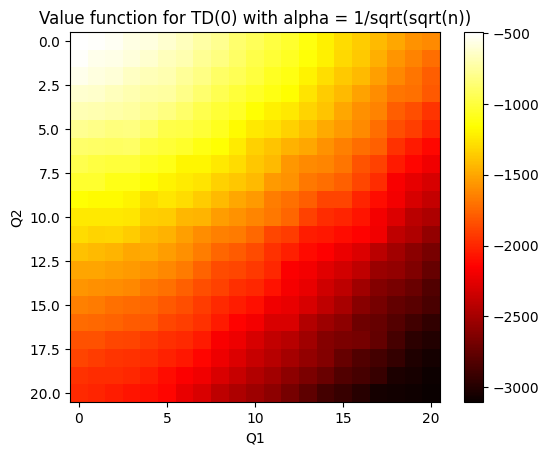

In [48]:
plt.imshow(Value_final_TD0,cmap='hot')
plt.colorbar()
plt.title('Value function for TD(0) with alpha = 1/sqrt(sqrt(n))')
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.show()

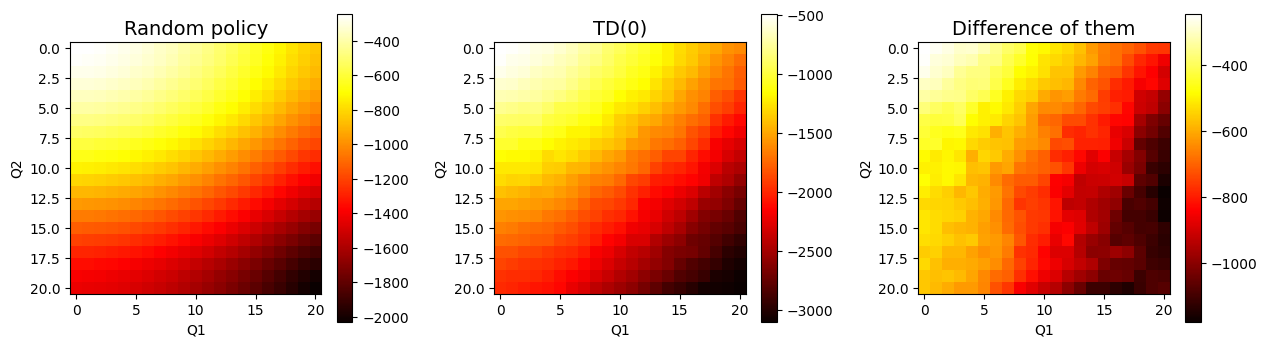

[[False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False F

In [49]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Value_final,cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('Random policy', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Value_final_TD0,cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('TD(0)', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')


ax_2=ax[2].imshow(Value_final_TD0 - Value_final,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Difference of them', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.show()
print((Value_final_TD0 - Value_final) > 0)

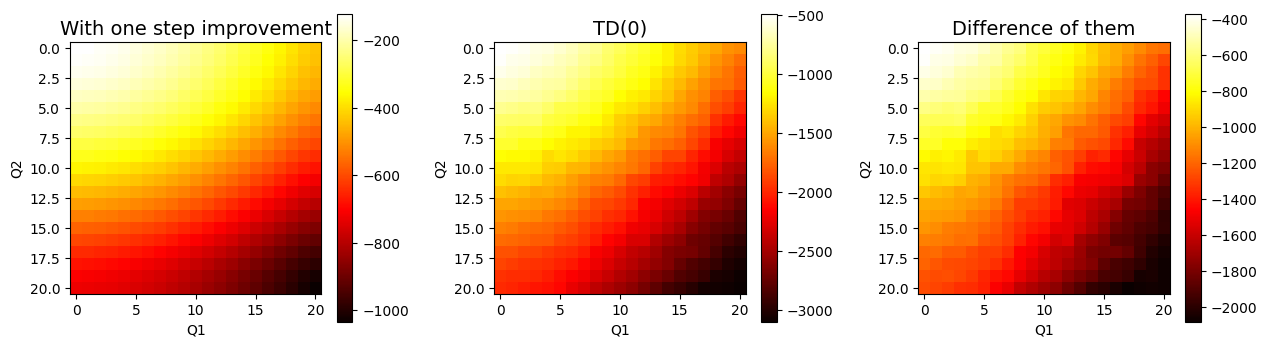

[[False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False F

In [50]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Value_final_one_step_imp,cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('With one step improvement', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Value_final_TD0,cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('TD(0)', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')


ax_2=ax[2].imshow(Value_final_TD0 - Value_final_one_step_imp,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Difference of them', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.show()
print((Value_final_TD0 - Value_final_one_step_imp) > 0)

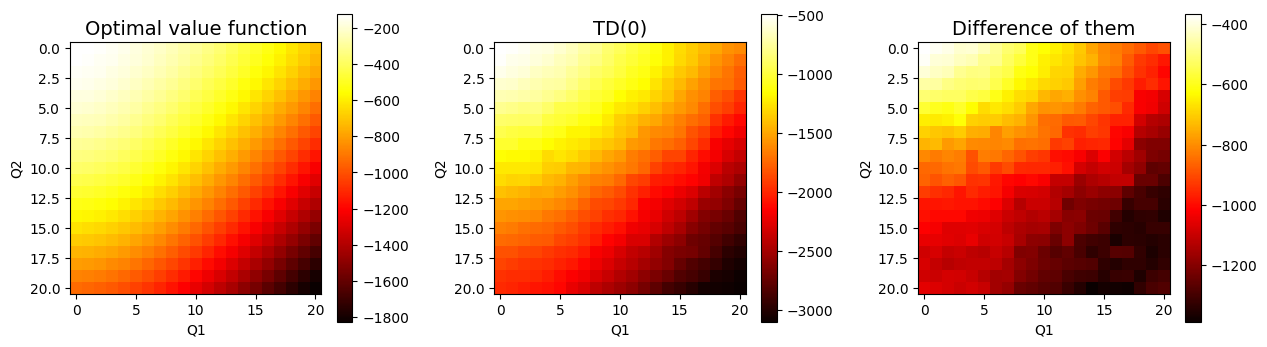

[[False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False F

In [51]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Value_final_optimal,cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('Optimal value function', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Value_final_TD0,cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('TD(0)', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')


ax_2=ax[2].imshow(Value_final_TD0 - Value_final_optimal,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Difference of them', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.show()

print((Value_final_TD0 - Value_final_optimal) > 0)


-----------------

In [52]:
def racine_m(x,m):
    for i in range(m):
        x = math.sqrt(x)
    return x

In [55]:
# Implement TD(0) with probability 0.5 to either queue 1 and 2, and take alpha = 1/n

import numpy as np
import math

lamda = 0.3

mu1 = 0.2
mu2 = 0.4

gamma = 0.99

p1 = 0.5

p2 = 0.5
# Simulate the environment

def simulate_env(Q1, Q2, action):
    Q1_minus_possible = True
    Q2_minus_possible = True
    Q1_plus_possible = True
    Q2_plus_possible = True
    one_action_done = False

    if Q1 == 20:
        Q1_plus_possible = False
        if Q2 == 20:
            Q2_plus_possible = False
            action = 2
        else:
            Q2_plus_possible = True
            action = 1
    else:
        Q1_plus_possible = True
        if Q2 == 20:
            Q2_plus_possible = False
            action = 0
        else:
            Q2_plus_possible = True

    if Q1 == 0:
        Q1_minus_possible = False
    else:
        Q1_minus_possible = True
    
    if Q2 == 0:
        Q2_minus_possible = False
    else:
        Q2_minus_possible = True

    if action == 0:
        if np.random.uniform() < lamda and Q1_plus_possible:
            Q1 += 1
            one_action_done = True
    else:
        if np.random.uniform() < lamda and Q2_plus_possible:
            Q2 += 1
            one_action_done = True
    
    if np.random.uniform() < mu1 and Q1_minus_possible and not one_action_done:
        Q1 -= 1
        one_action_done = True
    if np.random.uniform() < mu2 and Q2_minus_possible and not one_action_done:
        Q2 -= 1
    
    return Q1, Q2

# Implement TD(0)

def TD0(alpha, n):
    Vn = np.zeros((21,21))
    Tirage = np.zeros((21,21))
    first_boucle = True
    count = 0
    Q1 = 0
    Q2 = 0

    while count < n:
        count +=1
        for Q1 in range(21):
            for Q2 in range(21):
                Tirage[Q1,Q2] +=1
                # alpha = 1
                alpha = 1/racine_m(Tirage[Q1,Q2],4)
                # alpha = 1/math.sqrt(math.sqrt(Tirage[Q1,Q2]))
                action = np.random.randint(0,2)
                Q1_new, Q2_new = simulate_env(Q1, Q2, action)
                Vn[Q1,Q2] = Vn[Q1,Q2] + alpha * (- (Q1 + Q2) + gamma * Vn[Q1_new,Q2_new] - Vn[Q1,Q2])

                # Q1 = np.random.randint(0,21)
                # Q2 = np.random.randint(0,21)
    
    return Vn

n = 3000

Value_final_TD0 = TD0(1, n)
print(Value_final_TD0)



[[ -559.01174907  -558.26099069  -567.95366575  -639.41793386
   -640.14483042  -729.56152293  -747.64640746  -766.83340006
   -781.93355778  -841.87943488  -849.08245371  -870.17136954
   -911.20996844  -916.87070847 -1126.09896842 -1147.6291376
  -1257.56551401 -1258.14958406 -1267.78103063 -1314.16710643
  -1399.65971296]
 [ -543.61223535  -560.09176858  -567.45194322  -619.35335298
   -628.55405936  -731.2404927   -752.04153173  -814.81892332
   -829.69564875  -957.13575997  -971.45922248  -985.55999727
  -1103.64883604 -1148.52438039 -1171.30495489 -1244.14610382
  -1252.93643055 -1333.51919305 -1366.53324673 -1571.04578722
  -1613.35906919]
 [ -564.76399316  -565.22024707  -581.34985496  -660.11290526
   -719.2622156   -885.745968    -905.78760323  -911.75186059
   -941.3204431   -997.85953945 -1009.2709793  -1026.152532
  -1185.70280613 -1192.7295667  -1209.04609883 -1255.85782304
  -1366.72982841 -1353.31146238 -1415.79528175 -1671.50413206
  -1710.93397557]
 [ -553.56324106  -

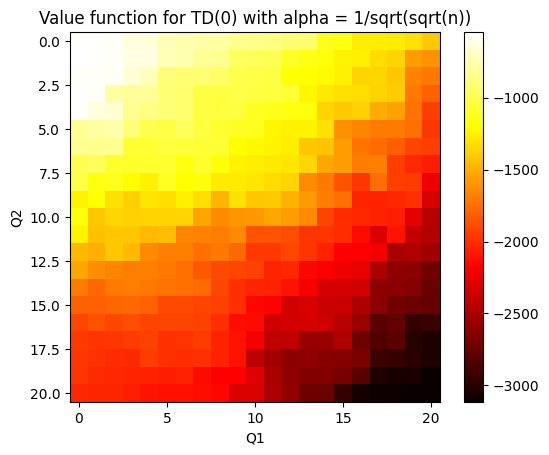

In [56]:
plt.imshow(Value_final_TD0,cmap='hot')
plt.colorbar()
plt.title('Value function for TD(0) with alpha = 1/sqrt(sqrt(n))')
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.show()

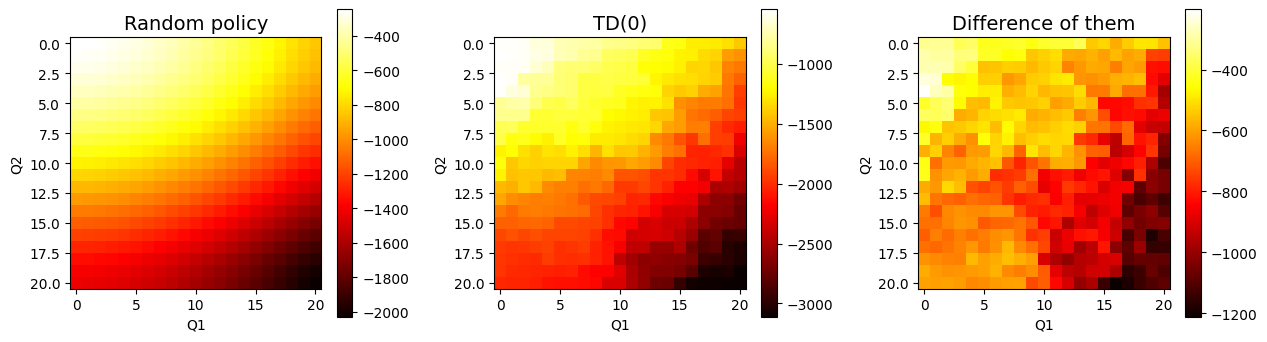

[[False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False]
 [False False False False False False False False False False False False
  False F

In [57]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Value_final,cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('Random policy', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Value_final_TD0,cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('TD(0)', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')


ax_2=ax[2].imshow(Value_final_TD0 - Value_final,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Difference of them', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.35)
plt.show()
print((Value_final_TD0 - Value_final) > 0)

2.2 Optimal control

In this part yo uare asked to find the optimal policy to dispatch incoming jobs
- Implement Q-learning


In [58]:
lamda = 0.3

mu1 = 0.2
mu2 = 0.4

gamma = 0.99
epsilon = 0.1


def Q_learning(alpha, n):
    Q_value = np.zeros((21,21,2))
    Tirage = np.zeros((21,21))
    count = 0
    Q1 = 0
    Q2 = 0

    while count < n:
        count +=1
        Tirage[Q1,Q2] +=1
        alpha = 1/Tirage[Q1,Q2]
        #Deciding the optimal action using epsilon-greedy
        if np.random.rand() < epsilon:
            action = np.random.randint(0,2)
        else:
            action = np.argmax(Q_value[Q1,Q2])
        
        #Simulating a new state
        Q1_new, Q2_new = simulate_env(Q1, Q2, action)
        #Measuring reward
        reward = - (Q1 + Q2)
        Q_value[Q1,Q2,action] = Q_value[Q1,Q2, action] + alpha * ( reward + gamma * np.max(Q_value[Q1_new,Q2_new]) - Q_value[Q1,Q2, action])

        Q1 = Q1_new
        Q2 = Q2_new

    return Q_value

n = 1000000

Final_Q_Value = Q_learning(1, n)
print(Final_Q_Value)

[[[  -2.42526708   -2.42546007]
  [  -5.34028251   -5.34148055]
  [  -9.11266896   -9.11183146]
  [ -12.82857468  -12.82747579]
  [ -16.56497733  -16.56243783]
  [ -19.40349601  -19.39979403]
  [ -21.89331327  -21.89842341]
  [ -23.57680048  -23.56630331]
  [ -25.5161642   -25.50283152]
  [ -25.88240922  -25.81461126]
  [ -28.1324167   -28.14468907]
  [ -29.35096148  -29.42410904]
  [ -32.93221197  -32.81421943]
  [ -27.5475486   -27.77050112]
  [ -25.66748774  -25.94670531]
  [ -30.27995388  -30.68705462]
  [ -32.70215362  -32.22484059]
  [ -37.76724728  -37.73873053]
  [ -33.60065861  -32.99680582]
  [ -33.24860787  -33.38835151]
  [ -29.405       -30.23948334]]

 [[  -6.33008929   -6.33064553]
  [  -9.43273991   -9.43242469]
  [ -13.23383821  -13.23354991]
  [ -16.7149773   -16.71499794]
  [ -19.94029542  -19.93937977]
  [ -23.01103669  -23.01291807]
  [ -25.62778746  -25.61834004]
  [ -27.90537096  -27.90114287]
  [ -29.76195618  -29.7594215 ]
  [ -30.22016355  -30.22231698]
  [ -3

In [59]:
def action_optimal(Q_value):
    n = len(Q_value)
    action_matrix = np.zeros((n,n))
    max_q_value_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            action_matrix[i,j] = np.argmax(Q_value[i,j])
            max_q_value_matrix[i,j] = np.max(Q_value[i,j])

    return action_matrix, max_q_value_matrix

In [60]:
action_matrix, max_Q_value = action_optimal(Q_value = Final_Q_Value)

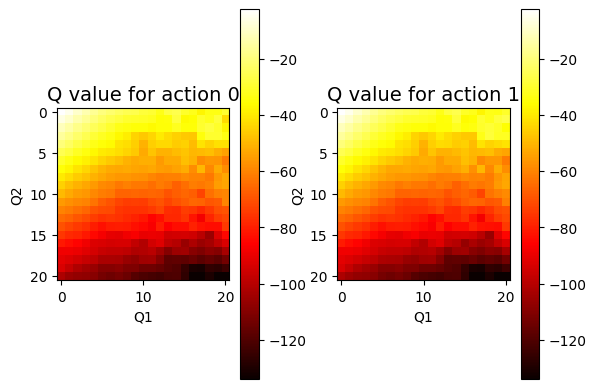

In [68]:
fig, ax = plt.subplots(1,2)
ax_0=ax[0].imshow(Final_Q_Value[:,:,0],cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('Q value for action 0', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Final_Q_Value[:,:,1],cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('Q value for action 1', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

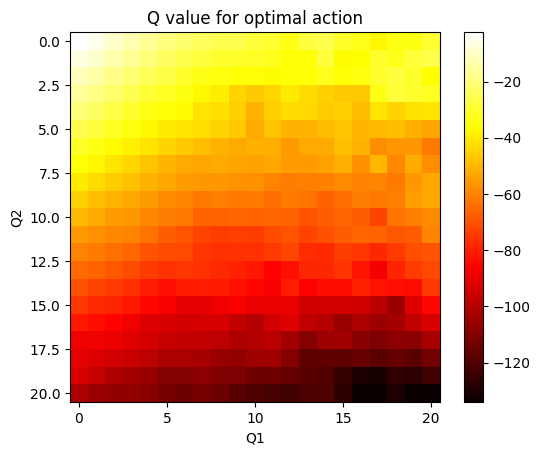

In [64]:
plt.imshow(max_Q_value,cmap = 'hot')
plt.colorbar()
plt.title('Q value for optimal action')
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.show()

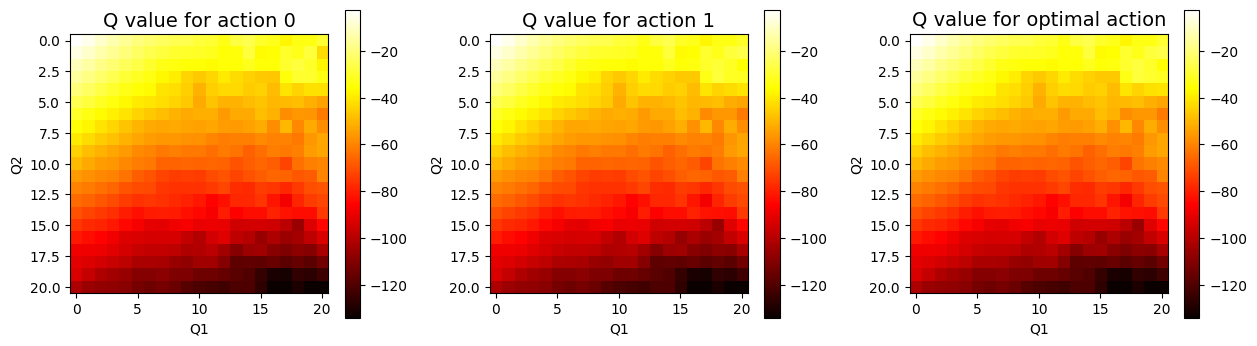

In [71]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Final_Q_Value[:,:,0],cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('Q value for action 0', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Final_Q_Value[:,:,1],cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('Q value for action 1', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')

ax_2=ax[2].imshow(max_Q_value,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Q value for optimal action', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

- Represent on the plane the optimal action as a function of the state ($Q_1$,$Q_2$)

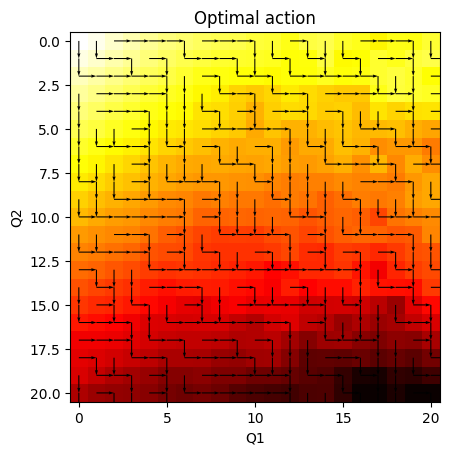

In [66]:
vecteurs = np.zeros((21,21,2))
for i in range(21):
    for j in range(21):
        if action_matrix[i,j] == 0:
            vecteurs[i,j] = [1,0]
        else:
            vecteurs[i,j] = [0,1]

fig, ax = plt.subplots()
ax.imshow(max_Q_value,cmap='hot')
ax.quiver(vecteurs[:,:,1], vecteurs[:,:,0], angles='xy', scale_units = 'xy', scale=1)
plt.title('Optimal action')
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.show()

- Explore other alternatives for $\alpha_n$, for example constant or $\frac{1}{n}$?, to see if convergence improves

In [93]:
lamda = 0.3

mu1 = 0.2
mu2 = 0.4

gamma = 0.99
epsilon = 0.1


def Q_learning(alpha, n):
    Q_value = np.zeros((21,21,2))
    Tirage = np.zeros((21,21))
    count = 0
    Q1 = 0
    Q2 = 0

    while count < n:
        count +=1
        Tirage[Q1,Q2] +=1
        # alpha = 1/Tirage[Q1,Q2]
        alpha = 1/math.pow(Tirage[Q1,Q2],1.5)
        #Deciding the optimal action using epsilon-greedy
        if np.random.rand() < epsilon:
            action = np.random.randint(0,2)
        else:
            action = np.argmax(Q_value[Q1,Q2])
        
        #Simulating a new state
        Q1_new, Q2_new = simulate_env(Q1, Q2, action)
        #Measuring reward
        reward = - (Q1 + Q2)
        Q_value[Q1,Q2,action] = Q_value[Q1,Q2, action] + alpha * ( reward + gamma * np.max(Q_value[Q1_new,Q2_new]) - Q_value[Q1,Q2, action])

        Q1 = Q1_new
        Q2 = Q2_new

    return Q_value

n = 1000000

Final_Q_Value = Q_learning(1, n)
action_matrix, max_Q_value = action_optimal(Q_value = Final_Q_Value)

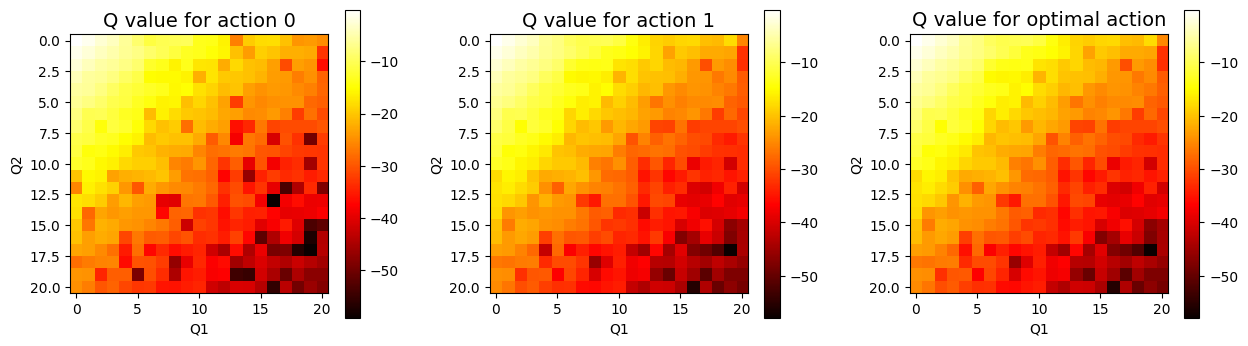

In [94]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Final_Q_Value[:,:,0],cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('Q value for action 0', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Final_Q_Value[:,:,1],cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('Q value for action 1', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')

ax_2=ax[2].imshow(max_Q_value,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Q value for optimal action', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

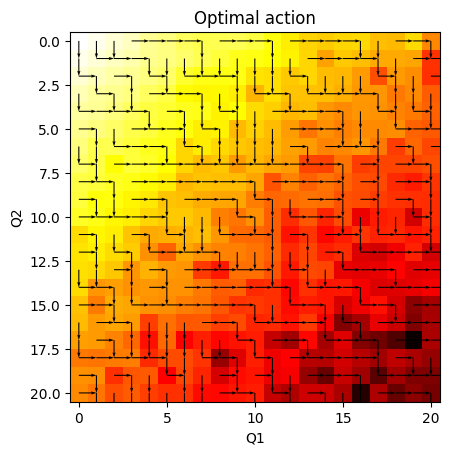

In [95]:
vecteurs = np.zeros((21,21,2))
for i in range(21):
    for j in range(21):
        if action_matrix[i,j] == 0:
            vecteurs[i,j] = [1,0]
        else:
            vecteurs[i,j] = [0,1]

fig, ax = plt.subplots()
ax.imshow(max_Q_value,cmap='hot')
ax.quiver(vecteurs[:,:,1], vecteurs[:,:,0], angles='xy', scale_units = 'xy', scale=1)
plt.title('Optimal action')
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.show()

In [76]:
lamda = 0.3

mu1 = 0.2
mu2 = 0.4

gamma = 0.99
epsilon = 0.1


def Q_learning(alpha, n):
    Q_value = np.zeros((21,21,2))
    Tirage = np.zeros((21,21))
    count = 0
    Q1 = 0
    Q2 = 0

    while count < n:
        count +=1
        Tirage[Q1,Q2] +=1
        alpha = 1
        # alpha = 1/math.sqrt(math.sqrt(Tirage[Q1,Q2]))
        #Deciding the optimal action using epsilon-greedy
        if np.random.rand() < epsilon:
            action = np.random.randint(0,2)
        else:
            action = np.argmax(Q_value[Q1,Q2])
        
        #Simulating a new state
        Q1_new, Q2_new = simulate_env(Q1, Q2, action)
        #Measuring reward
        reward = - (Q1 + Q2)
        Q_value[Q1,Q2,action] = Q_value[Q1,Q2, action] + alpha * ( reward + gamma * np.max(Q_value[Q1_new,Q2_new]) - Q_value[Q1,Q2, action])

        Q1 = Q1_new
        Q2 = Q2_new

    return Q_value

n = 1000000

Final_Q_Value = Q_learning(1, n)
action_matrix, max_Q_value = action_optimal(Q_value = Final_Q_Value)

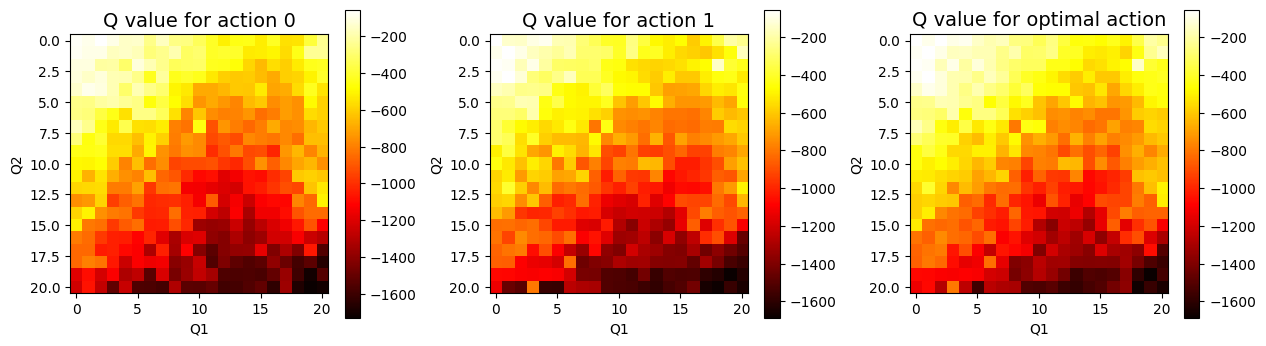

In [78]:
fig, ax = plt.subplots(1,3, figsize=(15, 4))
ax_0=ax[0].imshow(Final_Q_Value[:,:,0],cmap='hot')
ax[0].set_ylabel('Q2')
ax[0].set_xlabel('Q1')
ax[0].set_title('Q value for action 0', fontsize=14)
sm_0 = plt.cm.ScalarMappable(cmap=ax_0.get_cmap(), norm=ax_0.norm)
sm_0.set_array([])
plt.colorbar(sm_0, ax=ax[0], orientation='vertical')

ax_1=ax[1].imshow(Final_Q_Value[:,:,1],cmap='hot')
ax[1].set_ylabel('Q2')
ax[1].set_xlabel('Q1')
ax[1].set_title('Q value for action 1', fontsize=14)
sm_1 = plt.cm.ScalarMappable(cmap=ax_1.get_cmap(), norm=ax_1.norm)
sm_1.set_array([])
plt.colorbar(sm_1, ax=ax[1], orientation='vertical')

ax_2=ax[2].imshow(max_Q_value,cmap='hot')
ax[2].set_ylabel('Q2')
ax[2].set_xlabel('Q1')
ax[2].set_title('Q value for optimal action', fontsize=14)
sm_2 = plt.cm.ScalarMappable(cmap=ax_2.get_cmap(), norm=ax_2.norm)
sm_2.set_array([])
plt.colorbar(sm_2, ax=ax[2], orientation='vertical')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

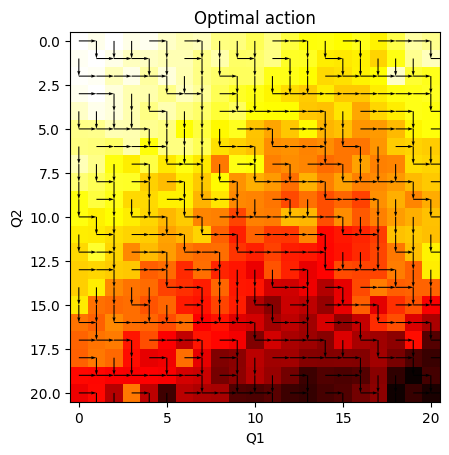

In [77]:
vecteurs = np.zeros((21,21,2))
for i in range(21):
    for j in range(21):
        if action_matrix[i,j] == 0:
            vecteurs[i,j] = [1,0]
        else:
            vecteurs[i,j] = [0,1]

fig, ax = plt.subplots()
ax.imshow(max_Q_value,cmap='hot')
ax.quiver(vecteurs[:,:,1], vecteurs[:,:,0], angles='xy', scale_units = 'xy', scale=1)
plt.title('Optimal action')
plt.xlabel('Q1')
plt.ylabel('Q2')
plt.show()

## 3. Model-free control with Value Function / Policy approximation

This section is a bit more open and research oriented. You are expected to propose and implement your own approach. The objective is to devise a scheme that can learn the optimal policy as found in Section 1 more efficiently than in Seciton 2 using a non-tabular approach. As you have probably found out in Section 2, Q-learning is not very efficient in learning the optimal policy for this problem. Some possible approaches are:
- Approximation for value function: Linear approximation, Neural Networks etc.
- Policy Approximation: softmax parametrization, or other parametrization inspired by the structural results of Section 1.
- Model-based Reinforcement learning using the conclusions from Section 1 on the optimal policy.


TODO:
- Add comments in the report
- Add screenshots in the report
- Copy paste code for part 2 with alpha exploration
- Do part 3